# Transformers and LLMs with Huggingface 🤗

We are going to run multiple examples using Transformers and LLMs exposed through huggingface, buy using the [pipeline](https://huggingface.co/docs/transformers/en/main_classes/pipelines) structure.

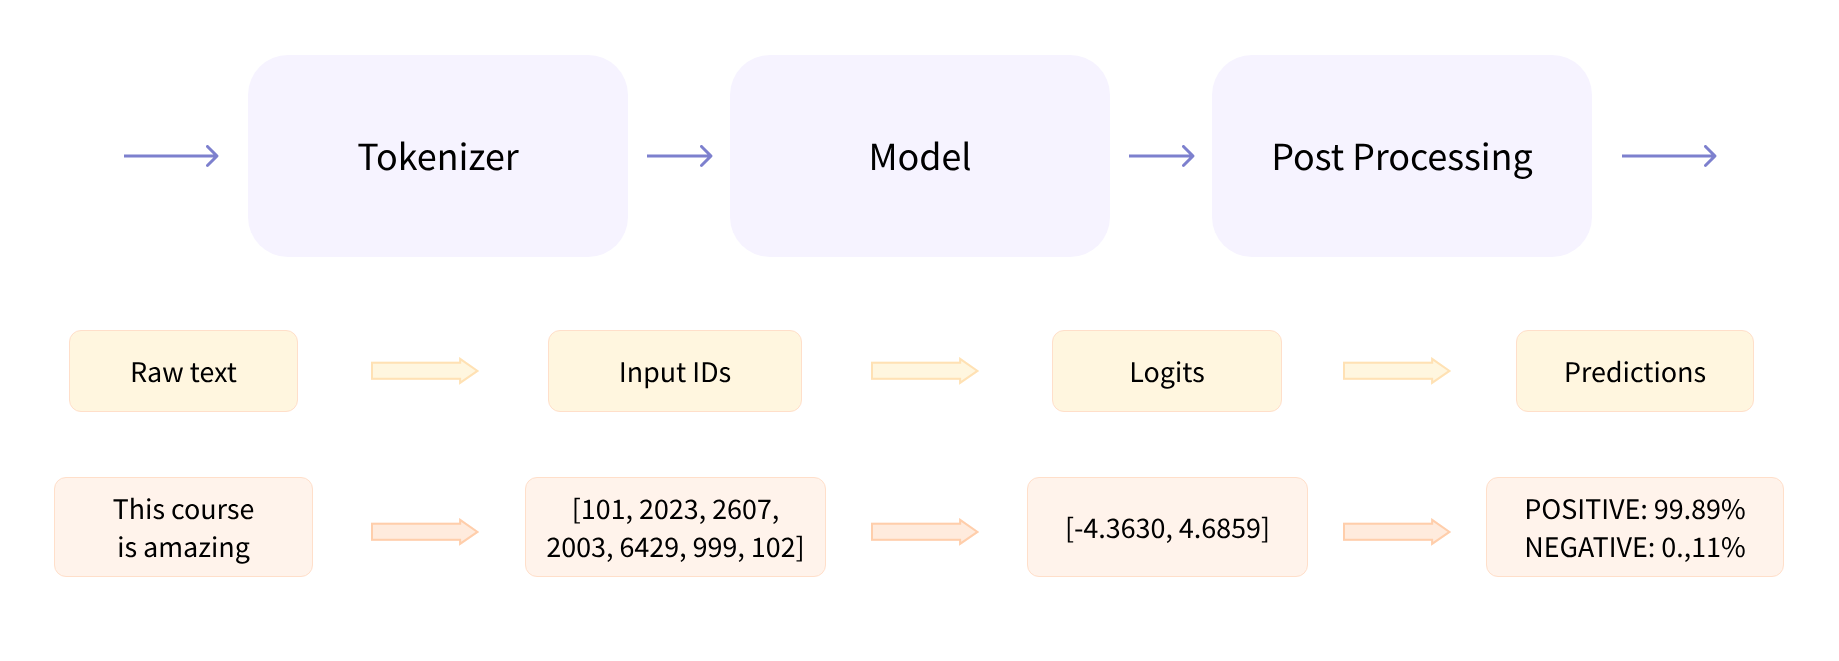

In [3]:
from transformers import pipeline
import pandas as pd

## Sentiment analysis

In [39]:
# Initialize the pipeline for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis")#, "distilbert/distilbert-base-uncased-finetuned-sst-2-english")
text = "I love transformers, not just because they are useful but also because they're fascinating."

# Run sentiment analysis
result = sentiment_pipeline(text)

print(f"Sentiment: {result[0]['label']}, with confidence {result[0]['score']:.4f}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentiment: POSITIVE, with confidence 0.9997


## Named Entity Recognition

In [1]:
# Initialize the pipeline for named entity recognition
ner_pipeline = pipeline("ner", "dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)

text = "Microsoft Corporation was founded by Bill Gates and Paul Allen on April 4, 1975."

results = ner_pipeline(text)

for entity in results:
    print(f"Entity: {entity['word']}, Type: {entity['entity_group']}, Score: {entity['score']:.4f}")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/taakaat3/Documents/code/tech_thursday_nlp_llm/.venv/lib/python3.12/site-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings

Entity: Microsoft Corporation, Type: ORG, Score: 0.9993
Entity: Bill Gates, Type: PER, Score: 0.9966
Entity: Paul Allen, Type: PER, Score: 0.9990


## Question Answering

In [4]:
df = pd.read_csv("../data/JEOPARDY_CSV.csv")
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [ ]:
df = df[[" Question", " Answer"]]
# rename columns
df.columns = ["Question", "Answer"]
df = df.head(100)
# create text by concatenating question and answer with : in between them
txt = ""
for index, row in df.iterrows():
    txt += row["Question"] + " : " + row["Answer"] + " \n"
print(txt)

In [43]:
qa_pipeline = pipeline("question-answering", "distilbert/distilbert-base-cased-distilled-squad")

#context = """I am Kara, a basketball player that scored 14.2 points per game, assisted 5.8 times per game, 
#             and rebounded 4.3 times per game, while having 0.5 turnovers per game. I played in 32 games this season. I am a point guard for the Los Angeles Lakers.
#             I was drafted as the 2nd overall pick in the 2017 NBA Draft. I was named the NBA Rookie of the Year in 2018."""
#question = "?"

context = txt
question = "Which player had 2,306 steals for the Bulls?"

result = qa_pipeline(question=question, context=context, handle_impossible_answer=True)

print(f"Answer: {result['answer']}, Score: {result['score']:.4f}")

Answer: Michael Jordan, Score: 0.9930


## Text Generation

In [3]:
# Initialize the pipeline for text generation using GPT-2 (as an example)
generator = pipeline("text-generation", model="gpt2")

prompt = "A story 1000 years ago started"

# Generate text
results = generator(prompt, max_length=100, num_return_sequences=1, truncation=True)

for result in results:
    print(f"Generated text: {result['generated_text']}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text: A story 1000 years ago started on the shores of Lake Mead in California. A small river flowed up in the middle of the ice and brought it all the way to New York's waterfront to be plucked out of the ice by a man named John Staunton, who had been sailing his father across the South of France. Staunton was able to retrieve the frozen lake at that time and put it on the ocean floor, though of course the lake's waters had increased significantly as it was


## Machine Translation


In [49]:
# Initialize the pipeline for translation from English to German
translator = pipeline("translation_en_to_de", "google-t5/t5-base", device="mps")

text = "This is a sentence in English that we want to translate into German."

# Perform translation
result = translator(text, max_length=100)

print(f"Translated text: {result[0]['translation_text']}")

/Users/taakaat3/Documents/code/tech_thursday_nlp_llm/venv/lib/python3.12/site-packages/transformers/models/t5/tokenization_t5_fast.py:171: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on google-t5/t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Translated text: Dies ist ein englischer Satz, den wir ins Deutsche übersetzen wollen.
